# PREDICTIVE MODEL


## Load Dataset


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preparation

### Data separation as x and y

In [2]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [3]:
x = df.drop('logS' , axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting

In [4]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=100)

In [5]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [6]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [7]:
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


In [8]:
y_test

,logS
822,-3.380
118,-8.010
347,-2.160
1123,-1.170
924,-0.730
...,...
1114,-4.130
427,-9.018
711,-0.600
4,-3.040


## Model Building

### Linear Regression

Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

Applying the model to prediction

In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [11]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [12]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

Evaluating Model Performance

In [13]:
from sklearn.metrics import mean_squared_error , r2_score

lr_train_mse = mean_squared_error(y_train , y_lr_train_pred)
lr_train_r2 = r2_score(y_train , y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
lr_test_r2 = r2_score(y_test , y_lr_test_pred)

In [14]:
lr_result = pd.DataFrame(['LinearRegression' , lr_train_mse , lr_train_r2 , lr_test_mse , lr_test_r2]).transpose()
lr_result.columns = ['METHOD' , 'TRAINING MSE' , 'TRAINING R2' , 'TESTING MSE' , 'TESTING R2']

In [15]:
lr_result

,METHOD,TRAINING MSE,TRAINING R2,TESTING MSE,TESTING R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


### Random Forest

Training the model

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2 , random_state = 100)
rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Applying the model to prediction

In [17]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [18]:
y_rf_train_pred

array([-4.44388581, -1.40132433, -1.41481453, -1.41481453, -1.44411435,
       -2.67492782, -2.50755276, -3.95611327, -4.62529592, -2.27343298,
       -2.69241199, -4.5150244 , -1.41481453, -2.67492782, -7.14501987,
       -2.30422396, -4.0676017 , -3.36086239, -2.53282364, -4.5150244 ,
       -2.47178242, -4.0676017 , -2.66143763, -1.42912192, -1.2164651 ,
       -7.14501987, -2.67492782, -2.47178242, -7.14501987, -1.2164651 ,
       -4.5150244 , -1.2164651 , -7.14501987, -1.41481453, -1.64246378,
       -4.5150244 , -4.5150244 , -1.41481453, -2.71012897, -1.64246378,
       -2.42959807, -2.89446137, -2.47178242, -1.24495146, -2.69241199,
       -1.2164651 , -1.2164651 , -4.65157679, -2.6279475 , -1.2164651 ,
       -1.79134844, -4.5150244 , -1.2164651 , -4.44388581, -4.62529592,
       -4.0676017 , -4.5150244 , -2.66143763, -1.41481453, -4.0676017 ,
       -2.67492782, -1.40132433, -3.32568382, -2.51725697, -4.44388581,
       -7.14501987, -7.14501987, -1.44411435, -4.5150244 , -1.42

In [19]:
y_rf_test_pred

array([-3.97313718, -7.14501987, -2.47178242, -2.40196468, -1.44411435,
       -1.40132433, -1.2164651 , -1.41481453, -7.14501987, -4.5150244 ,
       -4.5150244 , -2.27343298, -1.83979246, -1.24495146, -4.5150244 ,
       -1.40132433, -1.24495146, -2.67492782, -2.67492782, -4.65157679,
       -3.00915981, -4.62529592, -7.12312525, -2.47657839, -4.5150244 ,
       -4.5150244 , -4.5150244 , -4.5150244 , -4.44388581, -1.2164651 ,
       -1.41481453, -2.67492782, -2.67492782, -1.42961706, -1.40132433,
       -2.27343298, -2.0381419 , -2.67492782, -4.5150244 , -1.38740573,
       -1.2164651 , -1.61447629, -7.14501987, -7.14501987, -7.12312525,
       -4.42408609, -2.0381419 , -1.41481453, -1.41481453, -2.50541484,
       -1.83979246, -4.5150244 , -1.2164651 , -2.6279475 , -4.62529592,
       -1.42912192, -7.14501987, -1.2164651 , -1.41481453, -4.62529592,
       -1.62796649, -2.69241199, -2.67492782, -2.66143763, -1.2164651 ,
       -1.23077249, -2.67492782, -4.00999869, -1.41481453, -4.21

Evaluating Model Performance

In [20]:
from sklearn.metrics import mean_squared_error , r2_score

rf_train_mse = mean_squared_error(y_train , y_rf_train_pred)
rf_train_r2 = r2_score(y_train , y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test , y_rf_test_pred)
rf_test_r2 = r2_score(y_test , y_rf_test_pred)

In [21]:
rf_result = pd.DataFrame(['LinearRegression' , rf_train_mse , rf_train_r2 , rf_test_mse , rf_test_r2]).transpose()
rf_result.columns = ['METHOD' , 'TRAINING MSE' , 'TRAINING R2' , 'TESTING MSE' , 'TESTING R2']

In [22]:
rf_result

,METHOD,TRAINING MSE,TRAINING R2,TESTING MSE,TESTING R2
0,LinearRegression,1.028228,0.759669,1.407688,0.709223


### Model Comparison

In [23]:
df_models = pd.concat([lr_result , rf_result] , axis = 0 )
df_models

,METHOD,TRAINING MSE,TRAINING R2,TESTING MSE,TESTING R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
0,LinearRegression,1.028228,0.759669,1.407688,0.709223


In [24]:
df_models.reset_index(drop = True)

,METHOD,TRAINING MSE,TRAINING R2,TESTING MSE,TESTING R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,LinearRegression,1.028228,0.759669,1.407688,0.709223


### Data virtualization for prediction Results

Text(0.5, 0, 'Experimental logS')

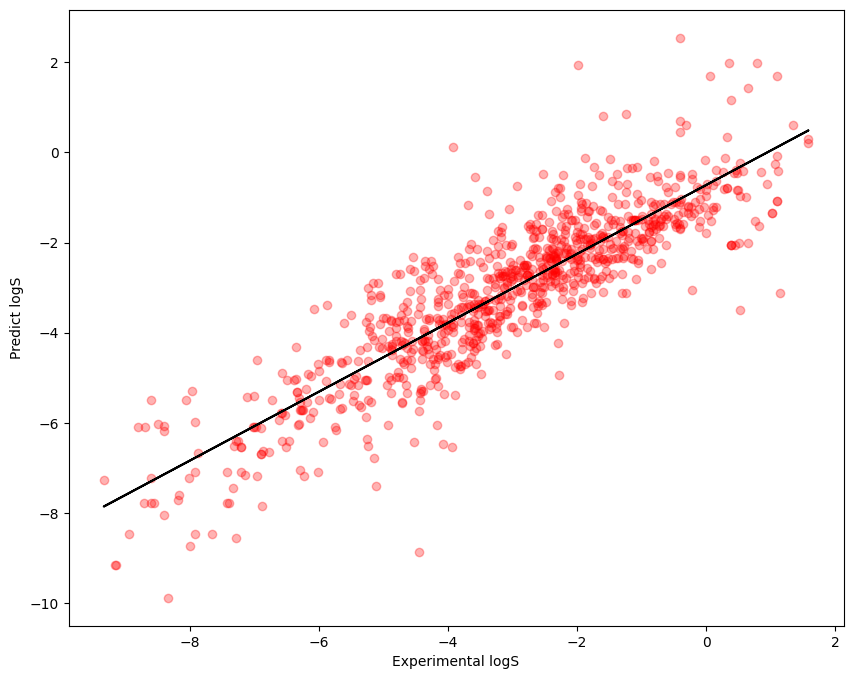

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,8))
plt.scatter(y_train , y_lr_train_pred , c='red' , alpha = 0.3)

z = np.polyfit(y_train , y_lr_train_pred , 1)
p = np.poly1d(z)

plt.plot(y_train , p(y_train) , 'black')
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')

## Make Predictions(Use the trained model to make predictions on new data)

In [26]:
x_new = pd.DataFrame([[0.123, 0.456, 0.789 , 0.796]], columns=x.columns)
y_lr_new_pred = lr.predict(x_new)
y_rf_new_pred = rf.predict(x_new)
y_lr_new_pred, y_rf_new_pred


(array([-0.22595674]), array([-1.2164651]))

### Insatall streamlit

In [27]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.9 MB/s eta 0:00:00


### Install pyngrok

In [28]:
!pip install pyngrok

## Streamlit App

In [29]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
st.title("Solubility Prediction App")
st.write("This app predicts solubility (`logS`) based on molecular descriptors.")

url = 'https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(url)

st.sidebar.header("Dataset Overview")
if st.sidebar.checkbox("Show raw data"):
    st.write(df.head())

# Feature and target selection
X = df.drop("logS", axis=1)
y = df["logS"]

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

# Sidebar inputs for user data
st.sidebar.header("User Input")
st.sidebar.write("Enter the molecular descriptor values for prediction.")

user_input = {}
for column in X.columns:
    user_input[column] = st.sidebar.number_input(f"{column}", min_value=float(df[column].min()), max_value=float(df[column].max()), value=float(df[column].mean()))

user_data = pd.DataFrame([user_input])

# Predict solubility
st.header("Model Predictions")
st.write("Input data for prediction:")
st.write(user_data)

lr_prediction = lr.predict(user_data)[0]
rf_prediction = rf.predict(user_data)[0]

st.subheader("Linear Regression Prediction")
st.write(f"Predicted `logS`: {lr_prediction:.3f}")

st.subheader("Random Forest Prediction")
st.write(f"Predicted `logS`: {rf_prediction:.3f}")

# Model evaluation
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "Training MSE": [
        mean_squared_error(y_train, lr_train_pred),
        mean_squared_error(y_train, rf_train_pred),
    ],
    "Testing MSE": [
        mean_squared_error(y_test, lr_test_pred),
        mean_squared_error(y_test, rf_test_pred),
    ],
    "Training R2": [
        r2_score(y_train, lr_train_pred),
        r2_score(y_train, rf_train_pred),
    ],
    "Testing R2": [
        r2_score(y_test, lr_test_pred),
        r2_score(y_test, rf_test_pred),
    ],
})

st.header("Model Evaluation Metrics")
st.write(results)



Writing app.py


### Run Streamlit App

In [30]:
!streamlit run app.py &>/dev/null&

### Create a public URL

In [31]:
!ngrok authtoken 2qnQQuzK9Bl2sYQqZZrL8sf17j7_2to1v7JbMKnUbdjqLSzb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [32]:
from pyngrok import ngrok

# Streamlit runs on port 8501 by default
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at {public_url}")


Streamlit app is live at NgrokTunnel: "https://f773-34-80-188-124.ngrok-free.app" -> "http://localhost:8501"
